In [1]:
# Import relevant modules
from rsqsim_api.catalogue.catalogue import RsqSimCatalogue
from rsqsim_api.fault.multifault import RsqSimMultiFault
from rsqsim_api.visualisation.animation import AnimateSequence
import os

# Tell python where fiele paths etc are relative to
script_dir = os.path.abspath('')
fault_dir = "../../../data/shaw2021/rundir5091"
catalogue_dir = fault_dir

Read in fault model and catalogue.
The files are quite large and can be downloaded from https://doi.org/10.5281/zenodo.5534462

In [3]:
fault_model = RsqSimMultiFault.read_fault_file_bruce(os.path.join(script_dir, fault_dir, "zfault_Deepen.in"),
                                                     os.path.join(script_dir, fault_dir, "znames_Deepen.in"),
                                                     transform_from_utm=True)
whole_catalogue = RsqSimCatalogue.from_catalogue_file_and_lists(os.path.join(catalogue_dir, "eqs..out"),
                                                                list_file_directory=catalogue_dir, list_file_prefix="catalog")

Filter catalogue for an arbitrary 1000-year period

In [5]:
filtered_cat = whole_catalogue.filter_whole_catalogue(
    min_t0=8.e12 + 1000*3.154e7, max_t0=8.e12 + 2000*3.154e7, min_mw=7.0)  # 1000 years


Create animations using different options

Plotting: 1/81
Plotting: 2/81
Plotting: 3/81
Plotting: 4/81
Plotting: 5/81
Plotting: 6/81
Plotting: 7/81
Plotting: 8/81
Plotting: 9/81
Plotting: 10/81
Plotting: 11/81
Plotting: 12/81
Plotting: 13/81
Plotting: 14/81
Plotting: 15/81
Plotting: 16/81
Plotting: 17/81
Plotting: 18/81
Plotting: 19/81
Plotting: 20/81
Plotting: 21/81
Plotting: 22/81
Plotting: 23/81
Plotting: 24/81
Plotting: 25/81
Plotting: 26/81
Plotting: 27/81
Plotting: 28/81
Plotting: 29/81
Plotting: 30/81
Plotting: 31/81
Plotting: 32/81
Plotting: 33/81
Plotting: 34/81
Plotting: 35/81
Plotting: 36/81
Plotting: 37/81
Plotting: 38/81
Plotting: 39/81
Plotting: 40/81
Plotting: 41/81
Plotting: 42/81
Plotting: 43/81
Plotting: 44/81
Plotting: 45/81
Plotting: 46/81
Plotting: 47/81
Plotting: 48/81
Plotting: 49/81
Plotting: 50/81
Plotting: 51/81
Plotting: 52/81
Plotting: 53/81
Plotting: 54/81
Plotting: 55/81
Plotting: 56/81
Plotting: 57/81
Plotting: 58/81
Plotting: 59/81
Plotting: 60/81
Plotting: 61/81
Plotting: 62/81
Plotting: 63/81
P

TypeError: plot_coast() got an unexpected keyword argument 'colors'

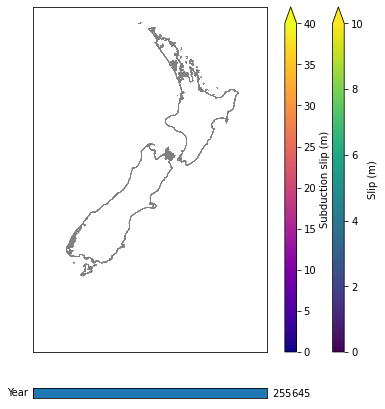

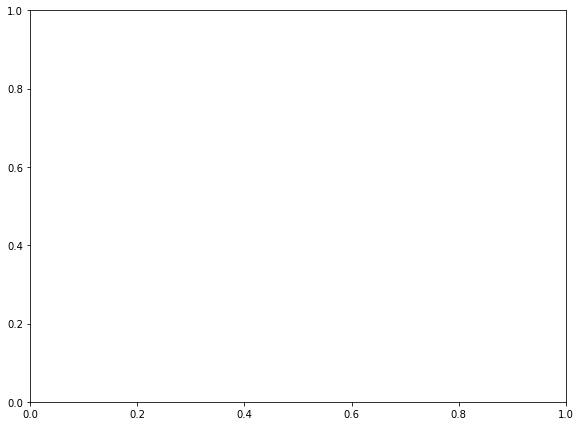

In [6]:
AnimateSequence(filtered_cat, fault_model, write="demo")
AnimateSequence(filtered_cat, fault_model, write="demoHillshade", hillshading_intensity=0.3, fps=10)
AnimateSequence(filtered_cat, fault_model, write="demoMovie", file_format="mp4", figsize=(10, 8))

Plotting: 1/81
Plotting: 2/81
Plotting: 3/81
Plotting: 4/81
Plotting: 5/81
Plotting: 6/81
Plotting: 7/81
Plotting: 8/81
Plotting: 9/81
Plotting: 10/81
Plotting: 11/81
Plotting: 12/81
Plotting: 13/81
Plotting: 14/81
Plotting: 15/81
Plotting: 16/81
Plotting: 17/81
Plotting: 18/81
Plotting: 19/81
Plotting: 20/81
Plotting: 21/81
Plotting: 22/81
Plotting: 23/81
Plotting: 24/81
Plotting: 25/81
Plotting: 26/81
Plotting: 27/81
Plotting: 28/81
Plotting: 29/81
Plotting: 30/81
Plotting: 31/81
Plotting: 32/81
Plotting: 33/81
Plotting: 34/81
Plotting: 35/81
Plotting: 36/81
Plotting: 37/81
Plotting: 38/81
Plotting: 39/81
Plotting: 40/81
Plotting: 41/81
Plotting: 42/81
Plotting: 43/81
Plotting: 44/81
Plotting: 45/81
Plotting: 46/81
Plotting: 47/81
Plotting: 48/81
Plotting: 49/81
Plotting: 50/81
Plotting: 51/81
Plotting: 52/81
Plotting: 53/81
Plotting: 54/81
Plotting: 55/81
Plotting: 56/81
Plotting: 57/81
Plotting: 58/81
Plotting: 59/81
Plotting: 60/81
Plotting: 61/81
Plotting: 62/81
Plotting: 63/81
P

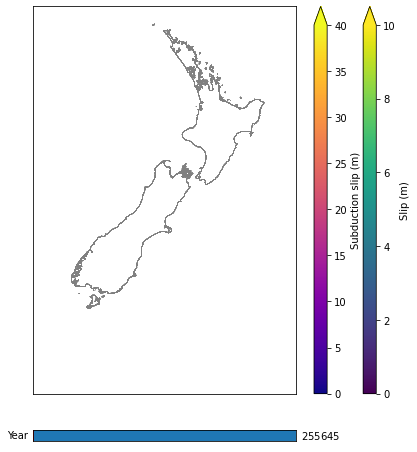

In [7]:
AnimateSequence(filtered_cat, fault_model, write="demoMovie", file_format="mp4", figsize=(10, 8))